<a href="https://colab.research.google.com/github/natifernandezs/Redes_Metabolicas/blob/main/Redesmetabolicas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cobra

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 19.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.8/141.8 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 26.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.3 MB/s eta 0:00:00


# Stoichiometric Interpretation of Esterichia coli Glucose Catabolism under Varoious Oxygenation Rates

Amit Varma, Brian W. Boesch and Bernard Palsson

In [ ]:
import cobra
from cobra.io import load_model

model = load_model("iAF1260")

Output()

In [ ]:
model

Name,iAF1260
Memory address,7ca3806d9b10
Number of metabolites,1668
Number of reactions,2382
Number of genes,1261
Number of groups,0
Objective expression,1.0*BIOMASS_Ec_iAF1260_core_59p81M - 1.0*BIOMASS_Ec_iAF1260_core_59p81M_reverse_3925e
Compartments,"cytosol, periplasm, extracellular space"


In [ ]:
cobra.util.linear_reaction_coefficients(model)


{<Reaction BIOMASS_Ec_iAF1260_core_59p81M at 0x7ca37eefe860>: 1.0}

/usr/local/lib/python3.10/dist-packages/cobra/util/solver.py:554: UserWarning: Solver status is 'infeasible'.
  warn(f"Solver status is '{status}'.", UserWarning)


Modelo no óptimo en esta iteración
Primer valor no nulo de acetato: q_acetato = 0.12950853783563393, mu = 0.9334040664298242
Primer valor no nulo de formato: q_formato = 0.17367579916026646, mu = 1.1192260452557756
Primer valor no nulo de etanol: q_ethanol = 0.13750565462536482, mu = 1.6465094943916831
8.39


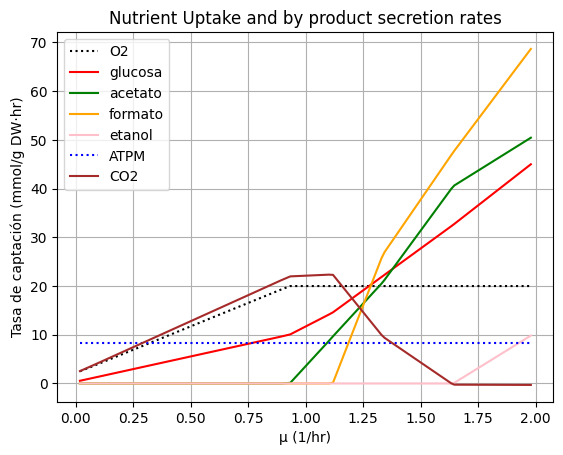

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir las reacciones clave en el modelo
oxygen_rxn = model.reactions.get_by_id("EX_o2_e")
glucose_rxn = model.reactions.get_by_id("EX_glc__D_e")
biomass_rxn = model.reactions.get_by_id("BIOMASS_Ec_iAF1260_core_59p81M")
acetate_rxn = model.reactions.get_by_id("EX_ac_e")
formate_rxn = model.reactions.get_by_id("EX_for_e")
ethanol_rxn = model.reactions.get_by_id("EX_etoh_e")
CO2_rxn = model.reactions.get_by_id("EX_co2_e")
ATPM= model.reactions.get_by_id("ATPM")
oxygen_rxn.bounds = (-20, 0)

# Inicializar listas para almacenar los resultados
glucose = np.linspace(0.1, 45, 100)  # Rango de captación de glucosa
q_oxygen = []
q_glucose = []
growth_rates = []
q_acetate = []
q_formate = []
q_ethanol = []
q_co2 = []
q_atpm=[]

# Bandera para controlar la impresión del primer valor no nulo
found_first_acetate = False
found_first_formate = False
found_first_ethanol = False

# Simulaciones a diferentes tasas de captación de glucosa
for qglc in glucose:
    with model:
        # Establecer el límite de captación de glucosa
        glucose_rxn.bounds = (-qglc, 0.0)

        # Optimizar el modelo
        solution = model.optimize()

        if solution.status == 'optimal':
            # Obtener las tasas de crecimiento, captación de O2 y captación de glucosa
            mu = solution.objective_value
            qo2 = solution.fluxes[oxygen_rxn.id]
            qglc = solution.fluxes[glucose_rxn.id]
            qac = solution.fluxes[acetate_rxn.id]
            qfor = solution.fluxes[formate_rxn.id]
            qet = solution.fluxes[ethanol_rxn.id]
            qco2 = solution.fluxes[CO2_rxn.id]
            qatpm = solution.fluxes[ATPM.id]

            # Almacenar los resultados
            growth_rates.append(mu)
            q_glucose.append(-qglc)
            q_oxygen.append(-qo2)
            q_acetate.append(qac)
            q_formate.append(qfor)
            q_ethanol.append(qet)
            q_co2.append(qco2)
            q_atpm.append(qatpm)

            # Imprimir el primer valor cuando qac, qfor o qet sean diferentes de 0
            if qac != 0 and not found_first_acetate:
                print(f"Primer valor no nulo de acetato: q_acetato = {qac}, mu = {mu}")
                found_first_acetate = True

            if qfor != 0 and not found_first_formate:
                print(f"Primer valor no nulo de formato: q_formato = {qfor}, mu = {mu}")
                found_first_formate = True

            if qet != 0 and not found_first_ethanol:
                print(f"Primer valor no nulo de etanol: q_ethanol = {qet}, mu = {mu}")
                found_first_ethanol = True
        else:
            print("Modelo no óptimo en esta iteración")
print(qatpm)

# Crear el gráfico
plt.plot(growth_rates, q_oxygen, label='O2', linestyle=':', color='black')
plt.plot(growth_rates, q_glucose, label='glucosa', linestyle='-', color='red')
plt.plot(growth_rates, q_acetate, label="acetato", linestyle='-', color='green')
plt.plot(growth_rates, q_formate, label="formato", linestyle='-', color='orange')
plt.plot(growth_rates, q_ethanol, label="etanol", linestyle='-', color='pink')
plt.plot(growth_rates, q_atpm, label="ATPM", linestyle=':', color='blue')
plt.plot(growth_rates, q_co2, label="CO2", linestyle='-', color='brown')
plt.xlabel('μ (1/hr)')
plt.ylabel('Tasa de captación (mmol/g DW·hr)')
plt.title('Nutrient Uptake and by product secretion rates')
plt.legend()
plt.grid(True)
plt.show()


# PPP

In [ ]:
from cobra.flux_analysis import production_envelope
prod_env = production_envelope(model, ["EX_glc__D_e", "EX_o2_e"])
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_glc__D_e,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-8.0,-20.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-8.0,-18.947368
2,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-8.0,-17.894737
3,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-8.0,-16.842105
4,EX_glc__D_e,0.0,0.0,NaN,0.722535,9.619439,NaN,-8.0,-15.789474


In [ ]:
prod_env = production_envelope(
    model, ["EX_o2_e"], objective="BIOMASS_Ec_iAF1260_core_59p81M", carbon_sources="EX_glc__D_e")

In [ ]:
prod_env.head()

,carbon_source,flux_minimum,carbon_yield_minimum,mass_yield_minimum,flux_maximum,carbon_yield_maximum,mass_yield_maximum,EX_o2_e
0,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-20.000000
1,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-18.947368
2,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-17.894737
3,EX_glc__D_e,0.0,0.0,NaN,0.736701,9.808039,NaN,-16.842105
4,EX_glc__D_e,0.0,0.0,NaN,0.722535,9.619439,NaN,-15.789474


In [ ]:
%matplotlib inline

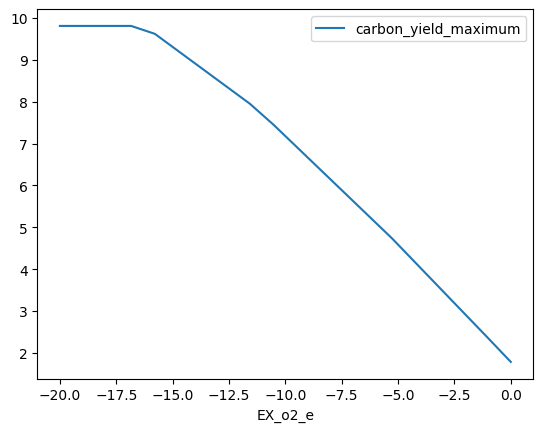

In [ ]:
prod_env.plot(
    kind='line', x='EX_o2_e', y='carbon_yield_maximum');

# ATP

El ATP de mantenimiento es constante y no se relaciona con la tasa de crecimiento celular, es decir, se requiere incluso si el organismo no está dividiéndose ni produciendo nuevas células.

En FBA, este valor se suele representar como un flujo fijo que representa el costo energético basal que se necesita para que la célula siga funcionando.